In [2]:
# libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [3]:
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor='tab:blue', markeredgecolor='tab:blue')


In [4]:
def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])


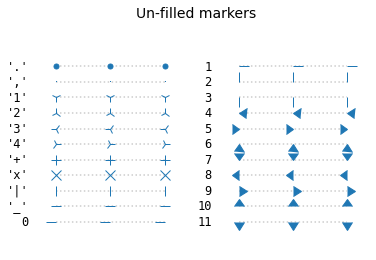

In [6]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()


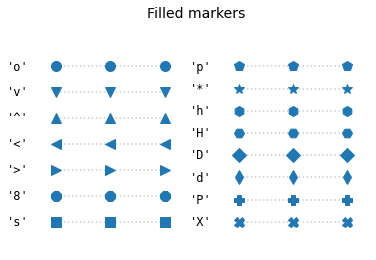

In [8]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()


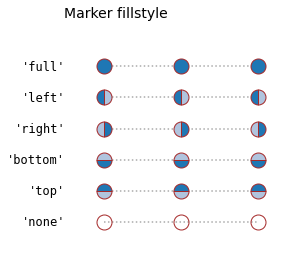

In [10]:
fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(
    marker='o', linestyle=':', markersize=15,
    color='darkgrey',
    markerfacecolor='tab:blue',
    markerfacecoloralt='lightsteelblue',
    markeredgecolor='brown'
)

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)

format_axes(ax)

plt.show()


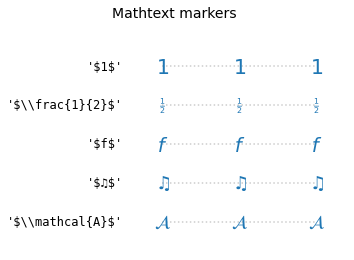

In [11]:
fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor='none', markersize=15)
markers = ['$1$', r'$\frac{1}{2}$', '$f$', '$\u266B$', '$\mathcal{A}$']

for y, marker in enumerate(markers):
    # escape dollars so that the text is writter 'as is', not as marhtext.
    ax.text(-0.5, y, repr(marker).replace('$', r'\$'), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)

format_axes(ax)

plt.show()


In [12]:
import matplotlib.path as mpath
import numpy as np


In [13]:
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
cut_star = mpath.Path(
    vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes=np.concatenate([circle.codes, star.codes])
)


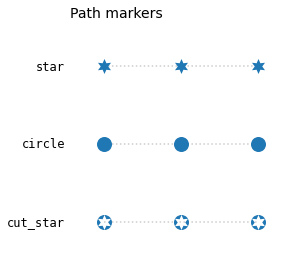

In [15]:
fig, ax = plt.subplots()
fig.suptitle('Path markers', fontsize=14)
fig.subplots_adjust(left=0.4)

markers = {'star': star, 'circle': circle, 'cut_star': cut_star}

for y, (name, marker) in enumerate(markers.items()):
    ax.text(-0.5, y, name, **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)

format_axes(ax)

plt.show()
